In [1]:
! python3 -m pip install --upgrade pip
! python3 -m pip install  --upgrade SpeechRecognition
! python3 -m pip install  --upgrade pydub
! python3 -m pip install  --upgrade sklearn

     |████████████████████████████████| 1.5 MB 744 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4
     |████████████████████████████████| 32.8 MB 22 kB/s  eta 0:00:01    |█████                           | 5.2 MB 2.3 MB/s eta 0:00:12     |█████████████▊                  | 14.1 MB 4.4 MB/s eta 0:00:05
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=57e2e62057c3d44ea6cddc4757c5331bca1a410275a7fd07e1a453061c41ffcd
  Stored in directory: /root/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [2]:
import IPython.display as ipd
import librosa
import librosa.display
import kapre
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import pandas as pd
import random
import re
import shutil
import speech_recognition as sr
import tensorflow as tf
from os import listdir
from os.path import isfile, join
from os import path
from plotnine import *
from pydub import AudioSegment
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Transcribe audio data to txt data

In [3]:
# TODO make an input from user
data_path = '/tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train'

audio_path_cc = data_path + '/Full_wave_enhanced_audio/cc/'
audio_path_cd = data_path + '/Full_wave_enhanced_audio/cd/'


text_path_cc = data_path + '/transcription/cc/'
text_path_cd = data_path + '/transcription/cd/'

lang_ = 'en-US'

r = sr.Recognizer()

In [4]:
meta_cc = pd.read_csv(data_path + '/cc_meta_data.txt', sep=";", header=0, 
                      names = ['ID', 'Age', 'Gender', 'MMSE'])
meta_cd = pd.read_csv(data_path + '/cd_meta_data.txt', sep=";", header=0, 
                      names = ['ID', 'Age', 'Gender', 'MMSE'])

meta = meta_cc.assign(Group = 'cc').append(meta_cd.assign(Group = 'cd')).reset_index()

meta['ID'] = meta['ID'].str.strip()

meta

,index,ID,Age,Gender,MMSE,Group
0,0,S001,74,male,NA,cc
1,1,S002,62,female,30,cc
2,2,S003,69,female,29,cc
3,3,S004,71,female,30,cc
4,4,S005,74,female,30,cc
...,...,...,...,...,...,...
103,49,S150,58,male,20,cd
104,50,S151,72,male,24,cd
105,51,S153,68,female,12,cd
106,52,S154,65,female,20,cd


In [5]:
sum(meta.MMSE == ' NA')

1

In [6]:
meta.MMSE = pd.to_numeric(meta.MMSE.replace(' NA', 30))
meta

,index,ID,Age,Gender,MMSE,Group
0,0,S001,74,male,30,cc
1,1,S002,62,female,30,cc
2,2,S003,69,female,29,cc
3,3,S004,71,female,30,cc
4,4,S005,74,female,30,cc
...,...,...,...,...,...,...
103,49,S150,58,male,20,cd
104,50,S151,72,male,24,cd
105,51,S153,68,female,12,cd
106,52,S154,65,female,20,cd


In [7]:
meta.dtypes

index      int64
ID        object
Age        int64
Gender    object
MMSE       int64
Group     object
dtype: object

In [8]:
def startConversion(path, filename, lang = lang_):
                
    # Create output file name
    output_dir = path + 'output_text/'
    output_file = '.'.join(filename.split(sep='.')[:-1]) + '.txt'
    output_file_path = output_dir + output_file
    
    # If output file does not exist, continue
    if os.path.exists(output_file_path):
        print("Sorry, " + output_file_path + " already exists")
    else:
        full_path = path + filename

        with sr.AudioFile(full_path) as source:
            print('Transcribing file: ' + str(filename) + ' in path: ' + str(full_path))
            audio_text = r.listen(source)
            # recognize_() method will throw a request error if the API is unreachable, hence using exception handling
            try:

                # using google speech recognition
                # print('Converting audio transcripts into text ...')
                text = r.recognize_google(audio_text)

                # Create output directory
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)

                with open(output_file_path, 'w') as f:
                    f.write(text)
                print('Finished transcribing text file ' + str(output_file) + ' at location ' + output_file_path)

            except Exception as e:
                print('Error: ' + str(e) + ' <- this guy')

In [12]:
# Running for CC path
onlyfiles = [f for f in listdir(audio_path_cc) if isfile(join(audio_path_cc, f))]

# Creating this for reference later
audio_cc_text_path = audio_path_cc + 'output_text/'

for filename in onlyfiles:
    startConversion(path = audio_path_cc, filename = filename)

Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S001.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S002.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S003.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/output_text/S004.txt already exists
Transcribing file: S005.wav in path: /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/S005.wav
Error:  <- this guy
Transcribing file: S006.wav in path: /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/S006.wav
Error:  <- this guy
Transcribing file: S007.wav in path: /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cc/S007.wav

In [13]:
# Running for CD path
onlyfiles = [f for f in listdir(audio_path_cd) if isfile(join(audio_path_cd, f))]

# Creating this for reference later
audio_cd_text_path = audio_path_cd + 'output_text/'

for filename in onlyfiles:
    startConversion(path = audio_path_cd, filename = filename)

Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S079.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S080.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S081.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S082.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S083.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S084.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/ADReSS-IS2020-data/train/Full_wave_enhanced_audio/cd/output_text/S086.txt already exists
Sorry, /tf/dementia/0extra/ADReSS-IS2020-train/A

In [14]:
text_dict = {"ID": [], "Text": []}

# CC path
onlytextfiles_cc = [f for f in listdir(audio_cc_text_path) if isfile(join(audio_cc_text_path, f))]
        
for filename in onlytextfiles_cc:
    just_name = filename.split(sep='.')[:-1][0]
    # print("Adding to dictionary: " + str(just_name))
    full_text_file_path = audio_cc_text_path + filename

    # Make all text lowercase
    # Remove special characters
    with open(full_text_file_path, "r") as file:
        data = file.read().replace('\n', '')
        text_dict["ID"].append(just_name)
        text_dict["Text"].append(data)

# CD path
onlytextfiles_cd = [f for f in listdir(audio_cd_text_path) if isfile(join(audio_cd_text_path, f))]

for filename in onlytextfiles_cd:
    just_name = filename.split(sep='.')[:-1][0]
    # print("Adding to dictionary: " + just_name)
    full_text_file_path = audio_cd_text_path + filename

    # Make all text lowercase
    # Remove special characters
    with open(full_text_file_path, "r") as file:
        data = file.read().replace('\n', '')
        text_dict["ID"].append(just_name)
        text_dict["Text"].append(data)

print("Done!")

Done!


In [15]:
# Convert the dictionary into DataFrame 
text_df = pd.DataFrame(text_dict)
text_df

,ID,Text
0,S001,tell me everything that you see going on in th...
1,S002,picture
2,S003,okay there is a little boy and he's getting he...
3,S004,Homedics laugh you ready well the sink is over...
4,S009,boy is taking cookies from the cookie jar givi...
...,...,...
97,S151,everything that you see happening in that pict...
98,S153,and tell me everything that you see happening ...
99,S154,okay and the boys getting in the cookie jar is...
100,S156,can you tell me now this one is in the cookie ...


In [16]:
merged_data = pd.merge(meta, text_df, on = "ID", how = "inner")
merged_data

,index,ID,Age,Gender,MMSE,Group,Text
0,0,S001,74,male,30,cc,tell me everything that you see going on in th...
1,1,S002,62,female,30,cc,picture
2,2,S003,69,female,29,cc,okay there is a little boy and he's getting he...
3,3,S004,71,female,30,cc,Homedics laugh you ready well the sink is over...
4,7,S009,67,male,30,cc,boy is taking cookies from the cookie jar givi...
...,...,...,...,...,...,...,...
96,49,S150,58,male,20,cd,now the boy on the chair is falling reaching u...
97,50,S151,72,male,24,cd,everything that you see happening in that pict...
98,51,S153,68,female,12,cd,and tell me everything that you see happening ...
99,52,S154,65,female,20,cd,okay and the boys getting in the cookie jar is...


# Reduce output labels by bucketizing

Reference: https://pubmed.ncbi.nlm.nih.gov/16473978/
MMSE ranges:
* 30 for no
* 26-29 for questionable
* 21-25 for mild
* 11-20 for moderate
* 0-10 for severe dementia

In [17]:
# Set a default value
merged_data['dementia_stage_num'] = 0
merged_data['dementia_stage_text'] = 'None'

In [18]:
# Set dementia stage value for all row indexes which MMSE are in certain ranges

# Questionable stage
merged_data['dementia_stage_num'][(merged_data['MMSE'] > 25) & (merged_data['MMSE'] < 30)] = 1
merged_data['dementia_stage_text'][(merged_data['MMSE'] > 25) & (merged_data['MMSE'] < 30)] = 'Questionable'

# Mild stage
merged_data['dementia_stage_num'][(merged_data['MMSE'] > 20) & (merged_data['MMSE'] < 26)] = 2
merged_data['dementia_stage_text'][(merged_data['MMSE'] > 20) & (merged_data['MMSE'] < 26)] = 'Mild'

# Moderate stage
merged_data['dementia_stage_num'][(merged_data['MMSE'] > 10) & (merged_data['MMSE'] < 21)] = 3
merged_data['dementia_stage_text'][(merged_data['MMSE'] > 10) & (merged_data['MMSE'] < 21)] = 'Moderate'

# Severe stage
merged_data['dementia_stage_num'][merged_data['MMSE'] < 10] = 4
merged_data['dementia_stage_text'][merged_data['MMSE'] < 10] = 'Severe'

merged_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be se

,index,ID,Age,Gender,MMSE,Group,Text,dementia_stage_num,dementia_stage_text
0,0,S001,74,male,30,cc,tell me everything that you see going on in th...,0,None
1,1,S002,62,female,30,cc,picture,0,None
2,2,S003,69,female,29,cc,okay there is a little boy and he's getting he...,1,Questionable
3,3,S004,71,female,30,cc,Homedics laugh you ready well the sink is over...,0,None
4,7,S009,67,male,30,cc,boy is taking cookies from the cookie jar givi...,0,None
...,...,...,...,...,...,...,...,...,...
96,49,S150,58,male,20,cd,now the boy on the chair is falling reaching u...,3,Moderate
97,50,S151,72,male,24,cd,everything that you see happening in that pict...,2,Mild
98,51,S153,68,female,12,cd,and tell me everything that you see happening ...,3,Moderate
99,52,S154,65,female,20,cd,okay and the boys getting in the cookie jar is...,3,Moderate


# Split dataset

In [20]:
# Vectorize text data so model can take it in
# Convert to 'dense array' (NP array)
# TODO make it so english is not hardcoded, flexible for all languages
# vectorizer = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1, 1))
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(merged_data["Text"]).toarray().astype(np.int)
y = np.array(merged_data["MMSE"].values).astype(np.int)

# dividing X, y into train and test data 
# 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training data set is length: " +str(len(y_train)))
print("Test data set is length: " +str(len(y_test)))

Training data set is length: 80
Test data set is length: 21


# Train and predict on Logistic regression

In [21]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.14285714285714285


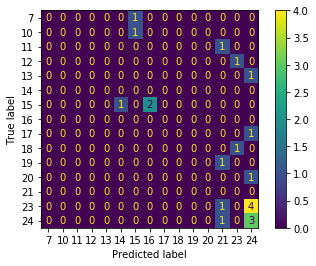

In [23]:
# Create and show confusion matrix
plot_confusion_matrix(logisticRegr, X_test, y_test)
plt.show()  

# Update data to test on groups instead of MMSE score

In [25]:
# Only need to replace Y values
y = np.array(merged_data["dementia_stage_num"].values).astype(np.int)

# dividing X, y into train and test data 
# 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training data set is length: " + str(len(y_train)))
print("Test data set is length: " + str(len(y_test)))

Training data set is length: 80
Test data set is length: 21


## Updated logistic regression model

In [26]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter = 10000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
param_values = {
                'penalty' : ['l1', 'l2'],
                'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]                
           }

# Try out the different n_estimators parameters
grid_search_cv = GridSearchCV(estimator = logisticRegr, param_grid = param_values, cv = None, scoring = 'accuracy') 
# A value of 'None' for cv causes this method to evaluate performance by 5-fold cross-validation

In [28]:
grid_search_cv.fit(X_train, y_train)

best_lr_C_value = grid_search_cv.best_params_['C']
best_penalty_value = grid_search_cv.best_params_['penalty']

print("Best C: " + str(best_lr_C_value) + ", best penalty: " + str(best_penalty_value))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs

Best C: 0.1, best penalty: l2


In [29]:
# Create a model with the best n_estimators value
lr_model = LogisticRegression(max_iter = 10000, penalty=best_penalty_value,C=best_lr_C_value)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print(classification_report(lr_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.67      0.67      0.67         6
           2       0.00      0.00      0.00         0
           3       0.62      0.56      0.59         9
           4       0.00      0.00      0.00         0

    accuracy                           0.62        21
   macro avg       0.42      0.38      0.40        21
weighted avg       0.69      0.62      0.65        21



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [30]:
print("Accuracy: ", accuracy_score(y_test, lr_pred))

Accuracy:  0.6190476190476191


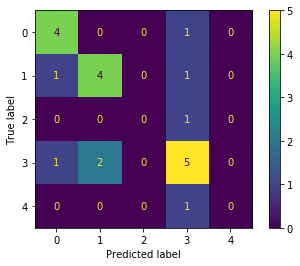

In [31]:
# Create and show confusion matrix
plot_confusion_matrix(lr_model, X_test, y_test)
plt.show()  

# SVM multi class classification based on stage

In [32]:
# Should be same data
# 'OVO' gets better results for some reason
# Linear kernel gets better results for some reason
clf = SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
param_values = {
                'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000],
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
           }

# Try out the different n_estimators parameters
grid_search_cv = GridSearchCV(estimator = clf, param_grid = param_values, cv = None, scoring = 'accuracy') 
# A value of 'None' for cv causes this method to evaluate performance by 5-fold cross-validation

In [34]:
grid_search_cv.fit(X_train, y_train)

best_svm_C_value = grid_search_cv.best_params_['C']
best_kernel_value = grid_search_cv.best_params_['kernel']

print("Best C: " + str(best_svm_C_value) + ", best kernel: " + str(best_kernel_value))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.


Best C: 5, best kernel: rbf


In [35]:
# Create a model with the best n_estimators value
svm_model = SVC(C=best_svm_C_value, decision_function_shape='ovo', kernel=best_kernel_value);
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.83      0.42      0.56        12
           2       0.00      0.00      0.00         0
           3       0.38      0.75      0.50         4
           4       1.00      1.00      1.00         1

    accuracy                           0.52        21
   macro avg       0.52      0.53      0.50        21
weighted avg       0.67      0.52      0.54        21



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [36]:
print("Accuracy: ", accuracy_score(y_test, svm_pred))

Accuracy:  0.5238095238095238


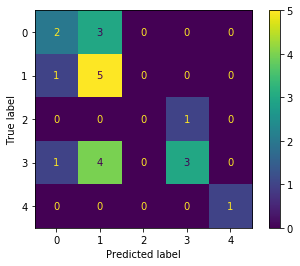

In [37]:
# Create and show confusion matrix
plot_confusion_matrix(svm_model, X_test, y_test)
plt.show()  

# Random forest classifier

In [38]:
# creating a RF classifier 
random_forest = RandomForestClassifier()   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
random_forest.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
n_estimators_values = {'n_estimators': [10, 20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

# Try out the different n_estimators parameters
grid_search_cv = GridSearchCV(estimator = random_forest, param_grid = n_estimators_values, cv = None, scoring = 'accuracy') 
# A value of 'None' for cv causes this method to evaluate performance by 5-fold cross-validation

In [40]:
grid_search_cv.fit(X_train, y_train)

best_n_estimators = grid_search_cv.best_params_['n_estimators']
best_n_estimators

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.


10

In [41]:
# Create a model with the best n_estimators value
rf_model = RandomForestClassifier(n_estimators = best_n_estimators);
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_predict_proba = rf_model.predict_proba(X_test)

print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.33      0.40         9
           2       0.00      0.00      0.00         1
           3       0.50      0.57      0.53         7
           4       0.00      0.00      0.00         0

    accuracy                           0.33        21
   macro avg       0.20      0.18      0.19        21
weighted avg       0.38      0.33      0.35        21



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [42]:
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, rf_pred)) 

ACCURACY OF THE MODEL:  0.3333333333333333


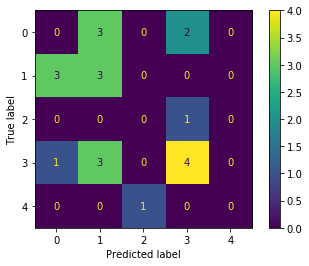

In [43]:
# Create and show confusion matrix
plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()  

# Neural net

In [ ]:
# Create a default model to track the best model
best_model =  MLPClassifier(hidden_layer_sizes = (1,), max_iter = 1000);
best_model.fit(X_train, y_train)
best_score = best_model.score(X_test, y_test)
best_hidden_layer_size = (1,)

# Create a neural net model with one hidden layer, iterating through hidden layer sizes
for hidden_layer_size in range(1, 100):
    model = MLPClassifier(hidden_layer_sizes = (hidden_layer_size,), max_iter = 1000);
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    
    if model_score > best_score:
        best_model = model;
        best_score = model_score
        best_hidden_layer_size = (hidden_layer_size, )
    
# Print the classification report for the best NN model that we have come up with
mlp_model = best_model
mlp_pred = mlp_model.predict(X_test)

print("The hidden layer size of our best-performing neural network in this experiment is: " + str(best_hidden_layer_size))
print(classification_report(mlp_pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

In [ ]:
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, mlp_pred))

In [ ]:
# Create and show confusion matrix
plot_confusion_matrix(mlp_model, X_test, y_test)
plt.show()  

# Chain models

In [ ]:
# TODO cross validate for models
def create_stacked():
    estimators = [
        ('rf',  RandomForestClassifier(n_estimators=best_n_estimators)),
        ('svm', SVC(C = best_svm_C_value, decision_function_shape='ovo', kernel=best_kernel_value)),
        ('nn', MLPClassifier(hidden_layer_sizes = (best_hidden_layer_size,), max_iter = 1000)),
        ('lr', LogisticRegression(C=best_lr_C_value, penalty=best_penalty_value))
    ]
    return StackingClassifier(estimators=estimators)

clf = create_stacked()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

In [ ]:
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, pred))

In [ ]:
# Create and show confusion matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()  

# TODO separate out people's voices